In [1]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
housing_data = pd.read_csv("Housing.csv")

# Quick overview of the dataset
print(housing_data.head())
print(housing_data.info())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [3]:
# Encode categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea', 'furnishingstatus']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    housing_data[col] = label_encoders[col].fit_transform(housing_data[col])


In [4]:
# Separate features (X) and target (y)
X = housing_data.drop(columns=['price'])
y = housing_data['price']

In [14]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (436, 12)
Testing data shape: (109, 12)


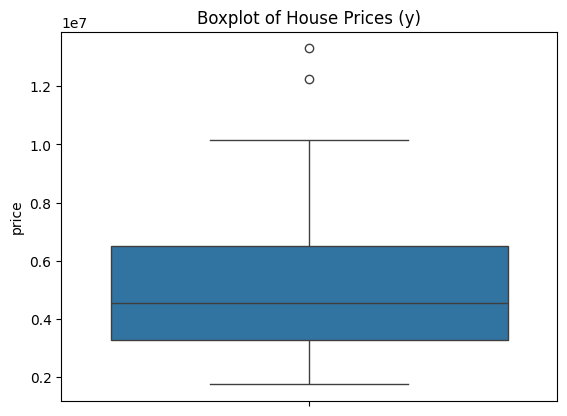

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(y_test)
plt.title("Boxplot of House Prices (y)")
plt.show()

In [16]:
Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from training set
train_mask = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_filtered, y_train_filtered = X_train[train_mask], y_train[train_mask]

# Apply same threshold to test set
test_mask = (y_test >= lower_bound) & (y_test <= upper_bound)
X_test_filtered, y_test_filtered = X_test[test_mask], y_test[test_mask]

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler_X = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler_X.fit_transform(X_train_filtered)
X_test_scaled = scaler_X.transform(X_test_filtered)

In [18]:
from sklearn.preprocessing import StandardScaler

# Scale the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train_filtered.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_filtered.values.reshape(-1, 1))

In [23]:
# Define the ANN model
ann_model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),  # Input layer
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),  # Hidden layer 1
    Dropout(0.2),
    Dense(16, activation='relu'),  # Hidden layer 2
    Dense(1)  # Output layer for regression
])


In [24]:
# Compile the model
ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary of the model
ann_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = ann_model.fit(X_train_scaled, y_train_scaled, validation_split=0.2, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0587 - mae: 0.8113 - val_loss: 0.9413 - val_mae: 0.7723
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8440 - mae: 0.7174 - val_loss: 0.7545 - val_mae: 0.6823
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6438 - mae: 0.6095 - val_loss: 0.6360 - val_mae: 0.6243
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5569 - mae: 0.5940 - val_loss: 0.5786 - val_mae: 0.5843
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4972 - mae: 0.5585 - val_loss: 0.5438 - val_mae: 0.5566
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3933 - mae: 0.4764 - val_loss: 0.5282 - val_mae: 0.5413
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4141 - mae: 0.4827 - val_loss: 0.5108 - val_mae: 0.5293
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4480 - mae: 0.4936 - val_loss: 0.4800 - val_mae: 0.5162
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3903 - mae: 

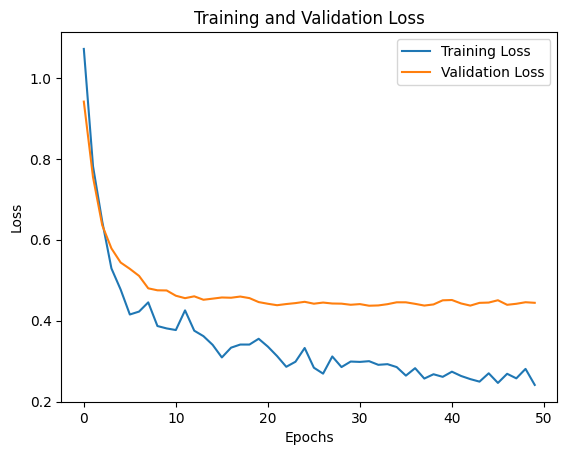

In [26]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
# Evaluate the model on the test set
test_loss, test_mae = ann_model.evaluate(X_test_scaled, y_test_scaled, verbose=1)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")
# Make predictions on the test set
y_pred_scaled = ann_model.predict(X_test_scaled)

# Inverse-transform the predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)  # Ensure it's in original units



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4707 - mae: 0.5087 
Test Loss: 0.4795888066291809, Test MAE: 0.5196192264556885
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [29]:
from math import sqrt

rmse = sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
r2 = r2_score(y_test_scaled, y_pred_scaled)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")

Test RMSE: 0.6925
Test R²: 0.6137


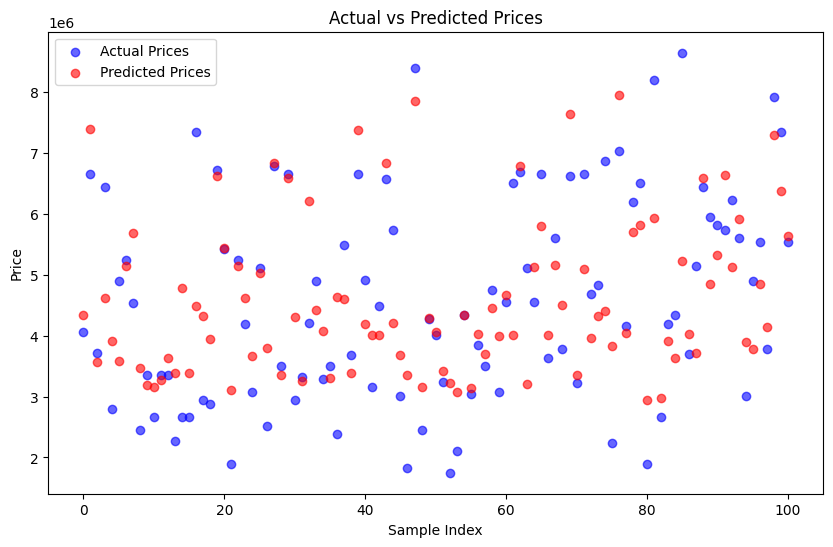

In [30]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_original)), y_test_original, label='Actual Prices', color='blue', alpha=0.6)
plt.scatter(range(len(y_test_original)), y_pred, label='Predicted Prices', color='red', alpha=0.6)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()
